# Lecture 10. Principal Component Analysis (PCA)

## What is Principal Component Analysis (PCA)?

Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and data analysis. It is a powerful tool for simplifying complex datasets by transforming the original set of features into a smaller set of uncorrelated variables called principal components.

The main idea behind PCA is to find the directions (principal components) that maximize the variance in the data. These principal components are orthogonal (perpendicular) to each other, and they capture the most important patterns or characteristics in the data.

### Why use PCA?

PCA is useful in several scenarios, including:

1. **Data Visualization**: PCA can be used to visualize high-dimensional data in 2D or 3D space by projecting the data onto the first few principal components.

2. **Dimensionality Reduction**: PCA can reduce the number of features in a dataset by keeping only the most important principal components, which can improve model performance and computational efficiency.

3. **Noise Reduction**: PCA can help remove noise and redundancy from the data by separating the signal (principal components) from the noise (remaining components).

4. **Feature Extraction**: PCA can be used for feature extraction by transforming the original features into a new set of uncorrelated features (principal components).

### How does PCA work?

PCA follows these steps:

1. **Standardize the data**: Center the data by subtracting the mean from each feature, and scale the data by dividing each feature by its standard deviation.

2. **Calculate the covariance matrix**: Compute the covariance matrix that describes the variance and correlation between features.

3. **Calculate the eigenvectors and eigenvalues**: Find the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors represent the principal components, and eigenvalues represent the amount of variance captured by each principal component.

4. **Select principal components**: Choose the top `k` eigenvectors (principal components) that capture the most variance in the data.

5. **Project the data**: Transform the original data onto the new subspace defined by the selected principal components.

After performing PCA, the transformed data (principal components) can be used as input for various machine learning algorithms or for data visualization and analysis.

PCA is a powerful technique, but it also has limitations. It assumes that the data is linear and may not be suitable for non-linear data. Additionally, the principal components may not always have a clear interpretation, which can make the results difficult to understand.

---

Using the Pima Diabetes dataset again, we would like to demonstrate PCA.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv'
data = pd.read_csv(file_path)

# Split the data into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We acquire the principle components. Here

In [3]:
# Perform PCA
pca = PCA(n_components=2)  # Choose the number of principal components
X_pca = pca.fit_transform(X_scaled)

Here we only choose the top two components, and see how effective it is.

In [4]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the principal components
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7077922077922078


It seems like the accuracy has decreased from 75% from previous notes (say ensemble) to 70%, that means in PCA there is still some informaiton loss. We would like to graph the decision boundary of PCA to have a look at it

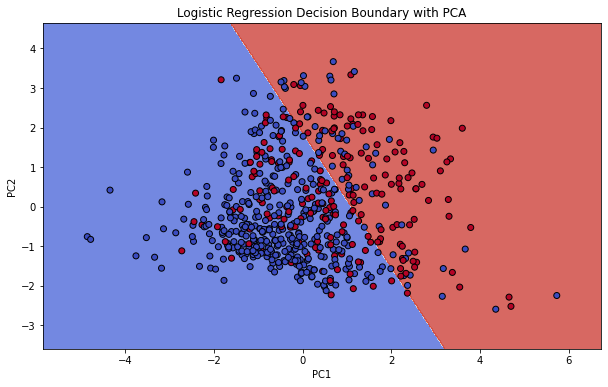

In [5]:
import matplotlib.pyplot as plt
# Create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict each point on the mesh
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the results
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Logistic Regression Decision Boundary with PCA')
plt.show()

### Logistic Regression Decision Boundary Visualization

The graph illustrates the decision boundary created by a logistic regression model that has been trained on a dataset reduced to two principal components. The decision boundary is a result of the logistic regression algorithm attempting to separate the two classes, indicated by the distinct colors:

- The **blue area** represents the region where the logistic regression model predicts the class label as '0'. Points within this area are more likely, according to the model, to belong to class '0'.
- The **red area** indicates where the model predicts the class label as '1'. Similarly, points that fall in this area are considered by the model to be more likely members of class '1'.

The actual data points are plotted over the decision boundary. Each point represents an observation from the training set:
- Points marked in **blue** correspond to the actual class '0'.
- Points marked in **red** correspond to the actual class '1'.

The decision boundary itself is the line where the transition from blue to red occurs, which denotes the threshold at which the logistic regression model switches its prediction from one class to another. Ideally, blue points should be predominantly on the blue side of the boundary, while red points should be mostly on the red side. The closeness of points to the boundary line indicates the level of uncertainty the model has about the classification of those points.

This visualization is particularly useful for understanding the effectiveness of the logistic regression model in classifying the data and how well the principal component analysis has captured the underlying structure necessary for separation by the logistic regression algorithm.


We would like to make a comparison of the accuracy of the logistic regression that contains the original variables.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the original features
logreg_original = LogisticRegression(max_iter = 1_000)
logreg_original.fit(X_train, y_train)

# Make predictions on the test set
y_pred_original = logreg_original.predict(X_test)

# Calculate the accuracy
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy (Logistic Regression without PCA): {accuracy_original}")

Accuracy (Logistic Regression without PCA): 0.7467532467532467


The difference is 0.039